# The comparison of tropical precipitation histograms for different data

# Structure

1. [Load of packages, modules and data](#1-load-of-packages-modules-and-data)

2. [Initialization of precipitation diagnostic and setting the class attributes](#2-initializing-the-class-object-and-setting-the-class-attributes)

3. [Calculation of histogram of tropical precipitation](#3-calculating-the-histograms-of-tropical-precipitation)
 
4. [Comparing the plots for different data](#4-comparing-the-plots-for-different-data)


## 1. Load of  packages, modules and data

In [20]:
import sys

from aqua import Reader, catalogue
from aqua.benchmark import functions_for_xarrays,  graphic_creator, time_functions
sys.path.insert(0, '../')
from src.trop_prec_diagnostic import TR_PR_Diagnostic as TR_PR_Diag
from aqua.benchmark.time_functions import time_interpreter as time_interpreter

In [23]:
reader = Reader(model="ICON", exp="ngc2009", source="atm_2d_ml_R02B09", regrid="r010")
icon = reader.retrieve(regrid=True)
time_interpreter(icon)

/home/b/b382267/mambaforge/envs/tropical-rainfall/lib/python3.10/site-packages/smmregrid/regrid.py:537: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  out = source_data.map(self.regrid, keep_attrs=True)
/home/b/b382267/mambaforge/envs/tropical-rainfall/lib/python3.10/site-packages/smmregrid/regrid.py:537: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.res

'30m'

In [22]:
reader = Reader(model="IFS", exp="tco2559-ng5", source="ICMGG_atm2d", regrid="r010")
ifs = reader.retrieve(regrid=True)
time_interpreter(ifs)

'1H'

In [24]:
reader = Reader(model="MSWEP", exp="past", source="monthly", regrid="r010")
mswep = reader.retrieve(regrid=True)
time_interpreter(mswep)

'M'

## 2. Initializing the class object and setting the class attributes

In [5]:
diag = TR_PR_Diag(trop_lat=15, s_time = 10, f_time = 20, num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-6)/15)

## 3. Calculating the histograms of tropical precipitation

In [10]:
hist_icon = diag.hist1d_fast(icon)
hist_icon 

<xarray.DataArray (bin: 20)>
array([6.903579e+06, 6.964800e+04, 3.705800e+04, 2.428600e+04,
       1.763600e+04, 1.353300e+04, 1.085500e+04, 9.089000e+03,
       7.773000e+03, 6.784000e+03, 5.793000e+03, 5.097000e+03,
       4.493000e+03, 3.969000e+03, 3.814000e+03, 3.470000e+03,
       3.083000e+03, 2.989000e+03, 2.710000e+03, 2.411000e+03])
Coordinates:
  * bin      (bin) float64 0.0 6.667e-08 1.333e-07 ... 1.2e-06 1.267e-06
Attributes: (12/26)
    CDI_grid_type:                unstructured
    cell_methods:                 t: mean
    long_name:                    Mean total precipitation rate
    number_of_grid_in_reference:  1
    param:                        52.1.0
    standard_name:                pr
    ...                           ...
    institution:                  Max Planck Institute for Meteorology/Deutsc...
    number_of_grid_used:          15
    references:                   see MPIM/DWD publications
    source:                       git@gitlab.dkrz.de:icon/icon-aes.git@87a1ea...
    title:                        ICON simulation
    uuidOfHGrid:                  0f1e7d66-637e-11e8-913b-51232bb4d8f9

In [11]:
hist_ifs  = diag.hist1d_fast(ifs)
hist_ifs

<xarray.DataArray (bin: 20)>
array([6.659502e+06, 1.276290e+05, 6.236400e+04, 4.080800e+04,
       3.030200e+04, 2.334100e+04, 1.905100e+04, 1.594300e+04,
       1.350900e+04, 1.178100e+04, 1.038900e+04, 9.150000e+03,
       8.307000e+03, 7.394000e+03, 6.762000e+03, 6.120000e+03,
       5.590000e+03, 5.129000e+03, 4.852000e+03, 4.328000e+03])
Coordinates:
  * bin      (bin) float64 0.0 6.667e-08 1.333e-07 ... 1.2e-06 1.267e-06
Attributes: (12/27)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    src_units:                  m
    units_fixed:                1
    edition:                    1
    centre:                     ecmf
    centreDescription:          European Centre for Medium-Range Weather Fore...
    subCentre:                  0

In [8]:
hist_mswep = diag.hist1d_fast(mswep)
hist_mswep 

<xarray.DataArray (bin: 20)>
array([4.486386e+06, 2.012868e+06, 5.873100e+05, 9.685800e+04,
       1.249900e+04, 3.041000e+03, 7.340000e+02, 1.890000e+02,
       4.300000e+01, 2.500000e+01, 1.700000e+01, 9.000000e+00,
       8.000000e+00, 7.000000e+00, 2.000000e+00, 0.000000e+00,
       2.000000e+00, 0.000000e+00, 2.000000e+00, 0.000000e+00])
Coordinates:
  * bin      (bin) float64 0.0 6.667e-08 1.333e-07 ... 1.2e-06 1.267e-06
Attributes:
    units:         m s**-1
    history:       2023-04-27 00:13:32 variable renamed by AQUA fixer;\n2023-...
    paramId:       172228
    long_name:     Mean total precipitation rate
    cfVarName:     tprate
    shortName:     tprate
    target_units:  m s**-1
    factor:        3.802570537683474e-10
    offset:        0
    src_units:     mm month-1
    units_fixed:   1

## 4. Comparing the plots for different data

### Not that timestep for MSWEP highly different 

{<Axes: title={'center': 'Tropical prec'}, xlabel='Precipitation, m s**-1', ylabel='PDF'>,
 <Figure size 640x480 with 1 Axes>}

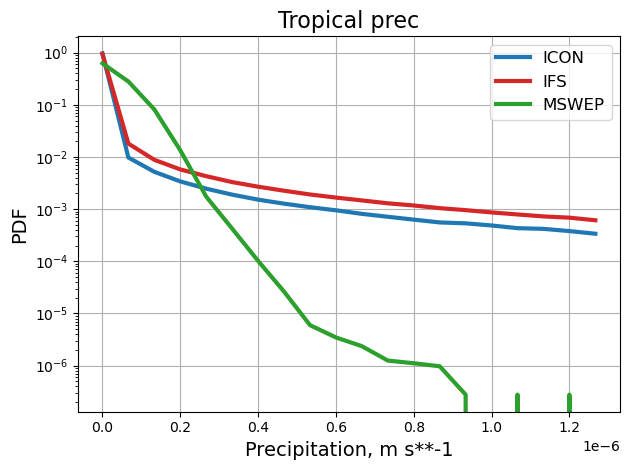

In [19]:
add = diag.hist_figure(hist_icon, pdf = True, smooth = True, label='ICON/ICON', save=False, plot_title = '')
diag.hist_figure(hist_ifs, pdf = True, smooth = True, add = add, color ='tab:red', label='IFS', save=False, 
                 plot_title = '') #"Trop precipitation rate comparison")
diag.hist_figure(hist_mswep, pdf = True, smooth = True, add = add, color ='tab:green', label='MSWEP', save=False, plot_title='Tropical prec')